## MA3K7 Project Task A

In [90]:
import numpy as np
import random
import matplotlib.pyplot as plt

We have $n$ strings, and each one is labelled $j$ at one end and $j+1$ at the other, for $j \in \{0,2,4,6,...,2n-2\}$. 

The below function returns a list where the 1st element is knotted to the 2nd, the 3rd is knotted to the 4th, etc. 

In [92]:
def game(n,k): # n is number of strings, k is number of knots
    free_ends = np.arange(2*n).tolist()
    knotted_ends = []
    for i in range(k):
        a = random.choice(free_ends)
        free_ends.remove(a)
        b = random.choice(free_ends)
        free_ends.remove(b)
        knotted_ends.extend([a,b])
    return knotted_ends

print(game(4,4))

[0, 6, 7, 5, 4, 1, 2, 3]


The code below is based on the case where $k=n$, so every string is part of a loop and no more knots can be made. The function 'game' prints an ordered list of numbers for each loop, which shows how the strings are attached. The last string in each list connects back to the first string. The function also returns the lengths of the loops.

In [125]:
def string(f_ends):
    x = random.choice(f_ends) # pick free string end at random
    y = 0
    if x%2 == 0: # if x is even
        y = x+1
    else: # if x is odd
        y = x-1
    return x,y # x is string end chosen for knotting, y is other end

def new_game(n): # n is number of strings
    free_ends = np.arange(2*n).tolist()
    knotted_ends = [] # will hold the loop currently being created
    loop_lengths = [] # will hold list of lengths of loops
    loop_counter = 0 # will hold the number of loops created
    start = 0 # will hold the first string end in the loop being created. Loop is complete when this end gets picked for a knot

    x,y = string(free_ends) # start new loop
    free_ends.remove(x) # remove string that will be knotted from list of free ends
    start = y
    knotted_ends.extend([y,x])

    while len(free_ends) != 0:
        x,y = string(free_ends)
        free_ends.remove(x)
        if x == start: # if we have made a loop
            #print(knotted_ends) # optional line
            loop_counter += 1
            loop_lengths.append(int(len(knotted_ends)/2)) # divide by 2 because each string has 2 ends
            knotted_ends = []

            if len(free_ends) != 0:
                x,y = string(free_ends) # start new loop
                free_ends.remove(x)
                start = y
                knotted_ends.extend([y,x])
        else: 
            knotted_ends.extend([x,y])
            free_ends.remove(y) # remove y from the list of free ends because our next chosen string end will be tied to it

    return loop_counter, loop_lengths

a, b = new_game(10)

print(f"We made {a} loops and their lengths are {b}")

We made 3 loops and their lengths are [8, 1, 1]


[212. 103.  73.  53.  47.  45.  31.  33.  25.  25.  31.  29.  22.  17.
  20.  23.  20.  14.  11.  13.  15.   9.  14.  16.  15.   6.  13.  15.
  12.   9.  12.  11.   4.   7.   6.   8.  11.   8.   9.   7.   8.  10.
   7.   9.   8.   7.   5.  13.   8.   5.  12.   8.   9.   5.   7.   5.
   8.   7.   6.  10.   7.   5.   5.  10.   6.   5.   3.   6.   3.   9.
   4.   6.   5.   8.   6.   6.   6.  11.   4.   9.   5.   5.   6.   8.
  18.   9.   4.  15.  10.   7.  12.   7.  12.   9.  13.  11.   9.  18.
  23.  33.]
[ 33. 118. 150. 110.  53.  22.  12.   2.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.

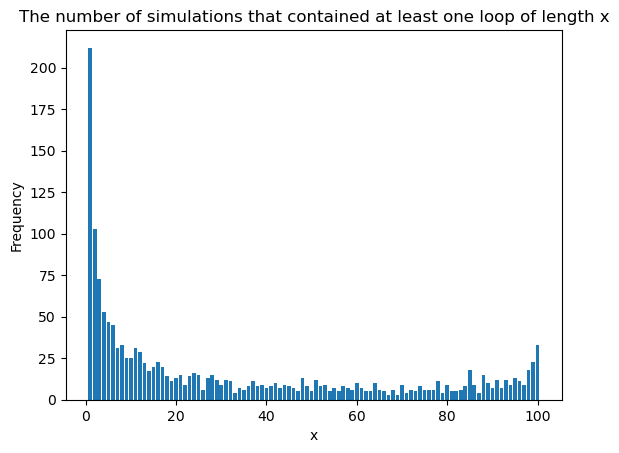

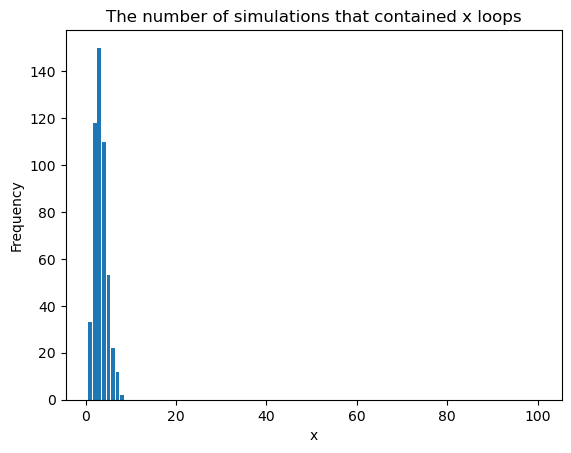

In [137]:
n=100

length_freq = np.zeros(n) # length_freq[i] will hold the number of simulations where we got a loop of length i+1
loop_freq = np.zeros(n) #loop_freq[i] will hold the number of simulations where we got i+1 loops

for x in range(500):
    number_loops, loop_lengths = new_game(n)
    loop_freq[number_loops-1] += 1
    for i in range(n):
        if i+1 in loop_lengths:
            length_freq[i] += 1

print(length_freq)
print(loop_freq)

plt.bar(range(1,n+1), length_freq)
plt.xlabel("x")
plt.ylabel("Frequency")
plt.title("The number of simulations that contained at least one loop of length x")
plt.show()

plt.bar(range(1,n+1), loop_freq)
plt.xlabel("x")
plt.ylabel("Frequency")
plt.title("The number of simulations that contained x loops")
plt.show()